In [17]:
import numpy as np
import matplotlib.pyplot as plt

from matplotlib import pyplot as plt
from matplotlib import colors

from neutronMS import MS_sim, GEN_constQgeom

In [66]:
geom = ('anular', 1.0, 1.3, 4)
geom = ('cuboid', 1, 5, 4)
#geom = ('cylinder', 1, 4)

mus=(0.36, 0.0259)
S_files = ('./data_Sq/Sqw_vanadium/S_mesh.npy', './data_Sq/Sqw_vanadium/Q_mesh.npy', './data_Sq/Sqw_vanadium/omega_mesh.npy')

## Test of the MS_sim class

In [70]:
ki=6.28
kf=6.28
theta=np.deg2rad(30)

In [71]:
sim = MS_sim(geom, mus, S_files, ki, kf, theta,)
sim.run(N=100000, N_bunch=100)

In [72]:
sim.Im/sim.Is

0.13264031973275253

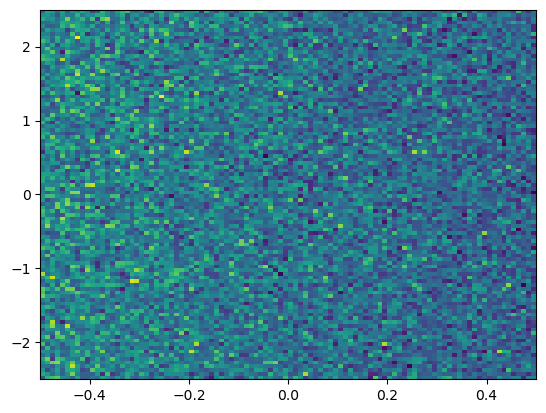

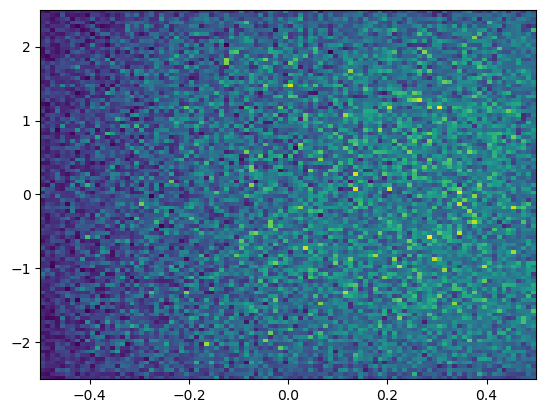

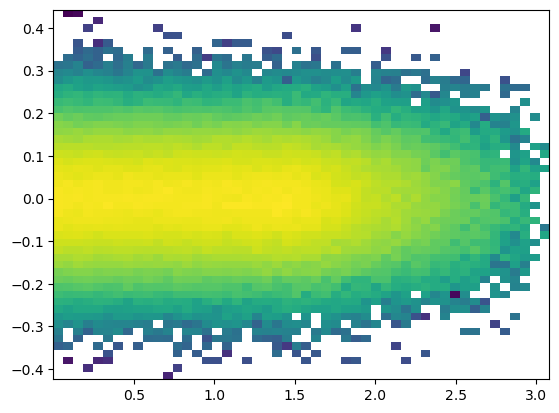

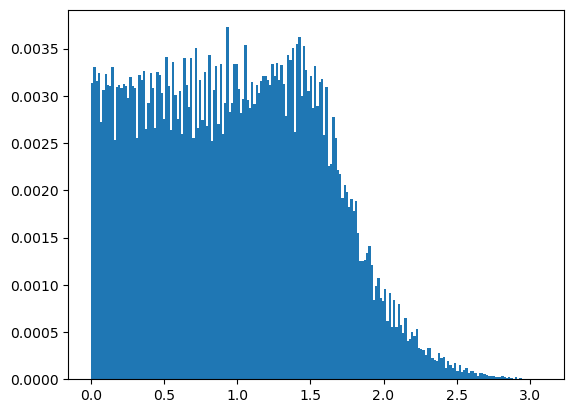

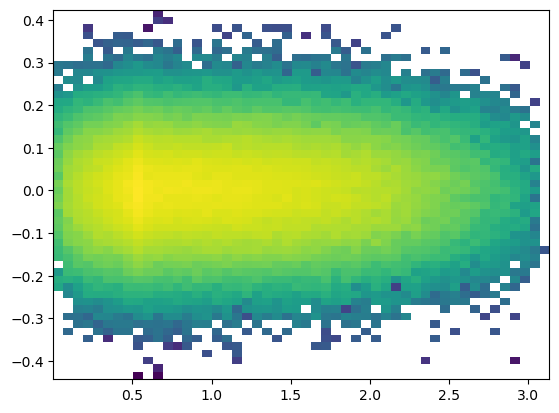

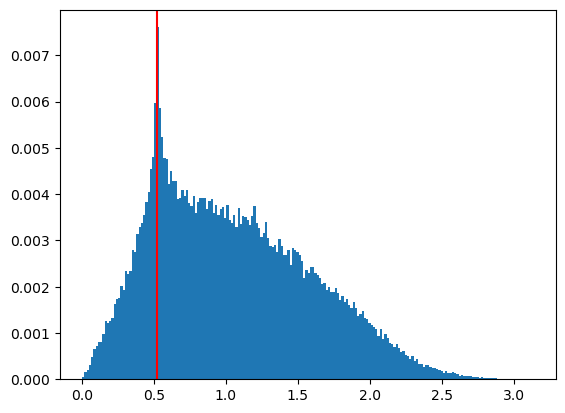

In [74]:
plt.figure()
plt.hist2d(sim.p1[:,0], sim.p1[:,1], bins=100, weights=sim.w1)
plt.figure()
plt.hist2d(sim.p2[:,0], sim.p2[:,1], bins=100, weights=sim.w2)

plt.figure()
plt.hist2d(sim.theta1m, sim.omega1m, weights=sim.wfm, norm=colors.LogNorm(), bins=50);
plt.figure()
plt.hist(sim.theta1m, weights=sim.wfm, bins=200);
plt.figure()
plt.hist2d(sim.theta2m, sim.omega2m, weights=sim.wfm, norm=colors.LogNorm(), bins=50);
plt.figure()
plt.hist(sim.theta2m, weights=sim.wfm, bins=200);
plt.axvline((theta), c='r')

## Loop usage example

In [23]:
######################################
kf = 5.8
omega = np.arange(-30, 30, 1)
Q = 1.5
######################################

data = GEN_constQgeom('inverse', 5.8, Q, omega)
data.head()

,omega,Q,ki,kf,Ei,Ef,theta
0,-30,1.5,4.377369,5.8,4.377369,69.702692,0.094409
1,-29,1.5,4.432153,5.8,4.432153,69.702692,0.121496
2,-28,1.5,4.486269,5.8,4.486269,69.702692,0.142043
3,-27,1.5,4.539739,5.8,4.539739,69.702692,0.158698
4,-26,1.5,4.592586,5.8,4.592586,69.702692,0.172664


In [24]:
for i in data.index:
    sim = MS_sim(geom, mus, S_files, data.ki.loc[i], data.kf.loc[i], data.theta.loc[i])
    sim.run(N=100000, N_bunch=40)
    data.loc[i,'Is'] = sim.Is
    data.loc[i,'Im'] = sim.Im

In [25]:
data.loc[:,'Im/Is'] = data.Im/data.Is
data.head(35)

,omega,Q,ki,kf,Ei,Ef,theta,Is,Im,Im/Is
0,-30,1.5,4.377369,5.8,4.377369,69.702692,0.094409,0.000000e+00,0.000000e+00,NaN
1,-29,1.5,4.432153,5.8,4.432153,69.702692,0.121496,0.000000e+00,0.000000e+00,NaN
2,-28,1.5,4.486269,5.8,4.486269,69.702692,0.142043,0.000000e+00,0.000000e+00,NaN
3,-27,1.5,4.539739,5.8,4.539739,69.702692,0.158698,0.000000e+00,0.000000e+00,NaN
4,-26,1.5,4.592586,5.8,4.592586,69.702692,0.172664,0.000000e+00,0.000000e+00,NaN
5,-25,1.5,4.644832,5.8,4.644832,69.702692,0.184615,0.000000e+00,0.000000e+00,NaN
6,-24,1.5,4.696498,5.8,4.696498,69.702692,0.194978,0.000000e+00,0.000000e+00,NaN
7,-23,1.5,4.747601,5.8,4.747601,69.702692,0.204043,0.000000e+00,0.000000e+00,NaN
8,-22,1.5,4.798159,5.8,4.798159,69.702692,0.212020,0.000000e+00,0.000000e+00,NaN
9,-21,1.5,4.848191,5.8,4.848191,69.702692,0.219066,0.000000e+00,0.000000e+00,NaN


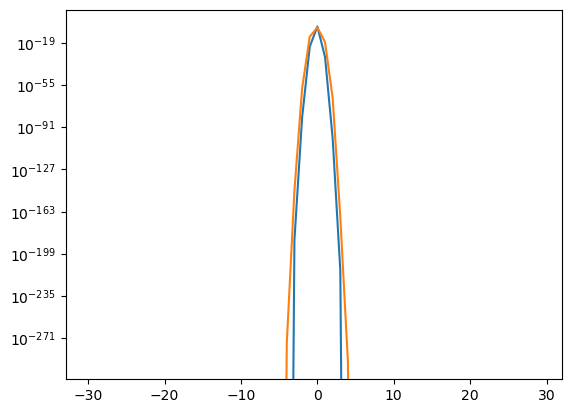

In [26]:
plt.plot(data.omega, data.Is)
plt.plot(data.omega, data.Im)

plt.yscale('log')

#plt.savefig('anular 11, 13')

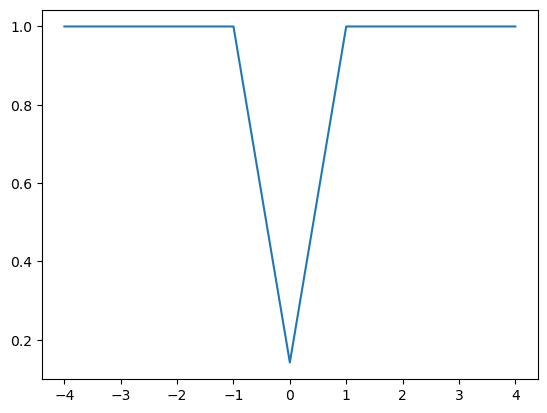

In [27]:
plt.plot(data.omega, data.Im/(data.Is+data.Im))